In [1]:
import pickle
import os
import pandas as pd
import pandana as pdn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plot

In [2]:
# Eskuzaitzeta data
trips_ez = pd.read_csv('../input_data/workers_eskuzaitzeta_2k.csv')

In [3]:
eliminar = ['Unnamed: 0', 'Com_Ori', 'Com_Des', 'Modo', 'Municipio', 'Motos','Actividad','Año',]
trips_ez = trips_ez.drop(columns=eliminar)
trips_ez

,Mun_Ori,Mun_Des,Hora_Ini,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,crnt_tur,Income,Income_Percentile,O_long,O_lat,D_long,D_lat
0,Donostia/San Sebastian,Errenteria,18:00,22,2,2,2 adultos con niño(s),2,5,1,21756.570,1,-1.951620,43.318235,-2.033693,43.256347
1,Pasaia,Oiartzun,07:45,22,1,2,Hogar de una persona,2,5,1,26603.660,4,-1.922339,43.326542,-2.033693,43.256347
2,Errenteria,Lezo,06:00,22,2,2,2 adultos con niño(s),1,4,1,26210.410,4,-1.902905,43.313945,-2.033693,43.256347
3,Errenteria,Lezo,07:40,22,2,3,Otros hogares con niños,1,5,1,27265.510,4,-1.898167,43.311368,-2.033693,43.256347
4,Andoain,Donostia/San Sebastian,16:05,22,2,2,2 adultos con niño(s),1,5,1,24223.070,2,-2.016226,43.220419,-2.033693,43.256347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,Donostia/San Sebastian,Errenteria,12:30,23,2,2,Otros hogares sin niños,1,5,1,23900.470,2,-1.961791,43.315185,-2.033693,43.256347
2502,Errenteria,Donostia/San Sebastian,08:30,22,2,2,Otros hogares sin niños,2,3,1,18671.675,1,-1.910143,43.313743,-2.033693,43.256347
2503,Donostia/San Sebastian,Hernani,08:00,21,2,2,Otros hogares sin niños,1,5,1,26243.960,4,-2.006557,43.319079,-2.033693,43.256347
2504,Lasarte-Oria,Donostia/San Sebastian,16:15,22,2,3,2 adultos con niño(s),2,4,1,25976.260,3,-2.016131,43.261821,-2.033693,43.256347


In [4]:
# Codify hour manually

# Create a copy column

trips_ez['Hora_Ini_E'] = trips_ez['Hora_Ini'].copy()
cols = list(trips_ez.columns)
A_index = cols.index('Hora_Ini')
cols = cols[:A_index+1] + ['Hora_Ini_E'] + cols[A_index+1:-1]
trips_ez = trips_ez[cols]

# Codify it
trips_ez['Hora_Ini'] = pd.to_datetime(trips_ez['Hora_Ini_E'], format='%H:%M') # Probably the first is Hora_Ini_E

# Calculates difference in minutes from "00:00" and divides by 5
trips_ez['Hora_Ini_E'] = ((trips_ez['Hora_Ini'] - pd.to_datetime('00:00', format='%H:%M')).dt.total_seconds() / 300).astype(int) + 1
trips_ez['Hora_Ini'] = trips_ez['Hora_Ini'].dt.strftime('%H:%M')
trips_ez

,Mun_Ori,Mun_Des,Hora_Ini,Hora_Ini_E,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,crnt_tur,Income,Income_Percentile,O_long,O_lat,D_long,D_lat
0,Donostia/San Sebastian,Errenteria,18:00,217,22,2,2,2 adultos con niño(s),2,5,1,21756.570,1,-1.951620,43.318235,-2.033693,43.256347
1,Pasaia,Oiartzun,07:45,94,22,1,2,Hogar de una persona,2,5,1,26603.660,4,-1.922339,43.326542,-2.033693,43.256347
2,Errenteria,Lezo,06:00,73,22,2,2,2 adultos con niño(s),1,4,1,26210.410,4,-1.902905,43.313945,-2.033693,43.256347
3,Errenteria,Lezo,07:40,93,22,2,3,Otros hogares con niños,1,5,1,27265.510,4,-1.898167,43.311368,-2.033693,43.256347
4,Andoain,Donostia/San Sebastian,16:05,194,22,2,2,2 adultos con niño(s),1,5,1,24223.070,2,-2.016226,43.220419,-2.033693,43.256347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,Donostia/San Sebastian,Errenteria,12:30,151,23,2,2,Otros hogares sin niños,1,5,1,23900.470,2,-1.961791,43.315185,-2.033693,43.256347
2502,Errenteria,Donostia/San Sebastian,08:30,103,22,2,2,Otros hogares sin niños,2,3,1,18671.675,1,-1.910143,43.313743,-2.033693,43.256347
2503,Donostia/San Sebastian,Hernani,08:00,97,21,2,2,Otros hogares sin niños,1,5,1,26243.960,4,-2.006557,43.319079,-2.033693,43.256347
2504,Lasarte-Oria,Donostia/San Sebastian,16:15,196,22,2,3,2 adultos con niño(s),2,4,1,25976.260,3,-2.016131,43.261821,-2.033693,43.256347


## Change ORIGIN to a walkable distance

In [5]:
# Define tus puntos del cuadrilátero como una lista de tuplas [(lat, long), ...]
puntos_cuadrilatero = [(43.259208, -2.037389), (43.258780, -2.024276), (43.251836, -2.037910), (43.251126, -2.027378)]

# Suponiendo que tienes un DataFrame df con columnas 'O_lat' y 'O_long'
# df = pd.DataFrame(...)

# Función para verificar si un punto está dentro de un cuadrilátero
def punto_dentro_cuadrilatero(x, y, puntos):
    n = len(puntos)
    inside = False

    p1x, p1y = puntos[0]
    for i in range(n + 1):
        p2x, p2y = puntos[i % n]
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Función para generar un punto aleatorio dentro del cuadrilátero
def generar_punto_dentro_cuadrilatero(puntos):
    min_lat = min(puntos, key=lambda x: x[0])[0]
    max_lat = max(puntos, key=lambda x: x[0])[0]
    min_long = min(puntos, key=lambda x: x[1])[1]
    max_long = max(puntos, key=lambda x: x[1])[1]

    while True:
        lat = np.random.uniform(min_lat, max_lat)
        long = np.random.uniform(min_long, max_long)
        if punto_dentro_cuadrilatero(lat, long, puntos):
            return lat, long

# Asigna un punto aleatorio a cada fila dentro del DataFrame
for index, row in trips_ez.iterrows():
    lat, long = generar_punto_dentro_cuadrilatero(puntos_cuadrilatero)
    trips_ez.at[index, 'O_lat'] = lat
    trips_ez.at[index, 'O_long'] = long


In [6]:
import folium
# Calcula el centro del mapa como el promedio de las latitudes y longitudes del cuadrilátero
centro_lat = sum(punto[0] for punto in puntos_cuadrilatero) / len(puntos_cuadrilatero)
centro_long = sum(punto[1] for punto in puntos_cuadrilatero) / len(puntos_cuadrilatero)

# Crea un mapa de Folium centrado en este punto
m = folium.Map(location=[centro_lat, centro_long], zoom_start=12)

# Añade los puntos del cuadrilátero al mapa
for punto in puntos_cuadrilatero:
    folium.Marker([punto[0], punto[1]], popup='Cuadrilátero', icon=folium.Icon(color='blue')).add_to(m)

# Añade los puntos del DataFrame al mapa
for index, row in trips_ez.iterrows():
    folium.Marker([row['O_lat'], row['O_long']], popup='Punto generado', icon=folium.Icon(color='green')).add_to(m)

m.save('relocate.html')


## Add travel times

In [7]:
# DRIVE

networks = dict.fromkeys({
 "walk",
 "drive",
})

for k in networks:
    print(k)
    networks[k] = pdn.network.Network.from_hdf5(f'../input_data/networks/{k}_net.h5')

# # TRANSIT

transit = dict.fromkeys({
 "transit_0001",
 "transit_0102",
 "transit_0203", # walk_network because transit is not available
 "transit_0304", # walk_network because transit is not available
 "transit_0405", # walk_network because transit is not available
 "transit_0506",
 "transit_0607",
 "transit_0708",
 "transit_0809",
 "transit_0910",
 "transit_1011",
 "transit_1112",
 "transit_1213",
 "transit_1314",
 "transit_1415",
 "transit_1516",
 "transit_1617",
 "transit_1718",
 "transit_1819",
 "transit_1920",
 "transit_2021",
 "transit_2122",
 "transit_2223",
 "transit_2324",
})

for k in transit:
    print(k)
    transit[k] = pdn.network.Network.from_hdf5(f'../input_data/transit_together_24h/{k}.h5')

drive
walk
transit_1112
transit_1415
transit_2122
transit_0506
transit_1718
transit_1920
transit_0809
transit_0304
transit_0203
transit_1314
transit_2021
transit_1213
transit_0607
transit_1011
transit_0910
transit_2324
transit_1516
transit_2223
transit_0708
transit_1617
transit_0001
transit_0405
transit_1819
transit_0102


In [8]:
# Assign tt

trips_ez["drive_tt"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            networks['drive'].get_node_ids(trips_ez.D_long,trips_ez.D_lat),
            imp_name='drive_time_s'
            )
trips_ez["drive_tt"] = trips_ez["drive_tt"] / 60 # To min

trips_ez["distance"] = networks['drive'].shortest_path_lengths(
            networks['drive'].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            networks['drive'].get_node_ids(trips_ez.D_long,trips_ez.D_lat),
            imp_name='distance'
            )

trips_ez["walk_tt"] = networks['walk'].shortest_path_lengths(
            networks['walk'].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            networks['walk'].get_node_ids(trips_ez.D_long,trips_ez.D_lat)
            )
trips_ez["walk_tt"] = trips_ez["walk_tt"] / 60

# Add TRANSIT

for k in transit:
    trips_ez[f"{k}_tt"] = transit[k].shortest_path_lengths(
            transit[k].get_node_ids(trips_ez.O_long,trips_ez.O_lat),
            transit[k].get_node_ids(trips_ez.D_long,trips_ez.D_lat)
    )

def asignar_valor(row):
    if 1 <= row['Hora_Ini_E'] <= 12:
        return row['transit_0001_tt']
    elif 13 <= row['Hora_Ini_E'] <= 24:
        return row['transit_0102_tt']
    elif 25 <= row['Hora_Ini_E'] <= 36:
        return row['transit_0203_tt']
    elif 37 <= row['Hora_Ini_E'] <= 48:
        return row['transit_0304_tt']
    elif 49 <= row['Hora_Ini_E'] <= 60:
        return row['transit_0405_tt']
    elif 61 <= row['Hora_Ini_E'] <= 72:
        return row['transit_0506_tt']
    elif 73 <= row['Hora_Ini_E'] <= 84:
        return row['transit_0607_tt']
    elif 85 <= row['Hora_Ini_E'] <= 96:
        return row['transit_0708_tt']
    elif 97 <= row['Hora_Ini_E'] <= 108:
        return row['transit_0809_tt']
    elif 109 <= row['Hora_Ini_E'] <= 120:
        return row['transit_0910_tt']
    elif 121 <= row['Hora_Ini_E'] <= 132:
        return row['transit_1011_tt']
    elif 133 <= row['Hora_Ini_E'] <= 144:
        return row['transit_1112_tt']
    elif 145 <= row['Hora_Ini_E'] <= 156:
        return row['transit_1213_tt']
    elif 157 <= row['Hora_Ini_E'] <= 168:
        return row['transit_1314_tt']
    elif 169 <= row['Hora_Ini_E'] <= 180:
        return row['transit_1415_tt']
    elif 181 <= row['Hora_Ini_E'] <= 192:
        return row['transit_1516_tt']
    elif 193 <= row['Hora_Ini_E'] <= 204:
        return row['transit_1617_tt']
    elif 205 <= row['Hora_Ini_E'] <= 216:
        return row['transit_1718_tt']
    elif 217 <= row['Hora_Ini_E'] <= 228:
        return row['transit_1819_tt']
    elif 229 <= row['Hora_Ini_E'] <= 240:
        return row['transit_1920_tt']
    elif 241 <= row['Hora_Ini_E'] <= 252:
        return row['transit_2021_tt']
    elif 253 <= row['Hora_Ini_E'] <= 264:
        return row['transit_2122_tt']
    elif 265 <= row['Hora_Ini_E'] <= 276:
        return row['transit_2223_tt']
    elif 277 <= row['Hora_Ini_E'] <= 288:
        return row['transit_2324_tt']
    else:
        return None 

# Create new column
trips_ez['transit_tt'] = trips_ez.apply(asignar_valor, axis=1)

# Don't know why but there are some extreme outliers on drive_tt. 70000 mins?
trips_ez = trips_ez.loc[trips_ez['drive_tt'] < 200].reset_index(drop=True)

trips_ez = trips_ez.drop(columns=['transit_1314_tt',
       'transit_2122_tt', 'transit_1617_tt', 'transit_0405_tt',
       'transit_0001_tt', 'transit_1213_tt', 'transit_1415_tt',
       'transit_0910_tt', 'transit_0708_tt', 'transit_1011_tt',
       'transit_0102_tt', 'transit_1516_tt', 'transit_0506_tt',
       'transit_2021_tt', 'transit_2324_tt', 'transit_1819_tt',
       'transit_0203_tt', 'transit_0809_tt', 'transit_1718_tt',
       'transit_2223_tt', 'transit_0304_tt', 'transit_1920_tt',
       'transit_0607_tt', 'transit_1112_tt'])

In [9]:
trips_ez = trips_ez.loc[trips_ez['transit_tt'] <= 700]
trips_ez = trips_ez.loc[trips_ez['walk_tt'] <= 2000]
trips_ez = trips_ez.reset_index(drop=True)

## Columns encoding

In [10]:
# Delete unnecessary columns
trips_ez = trips_ez.drop(columns=['Hora_Ini', 'Income', 'Income_Percentile', 'O_long', 'O_lat', 'D_long', 'D_lat'])
trips_ez

,Mun_Ori,Mun_Des,Hora_Ini_E,Recur,Per_hog,Turismos,Tipo_familia,Sexo,Edad,crnt_tur,drive_tt,distance,walk_tt,transit_tt
0,Donostia/San Sebastian,Errenteria,217,22,2,2,2 adultos con niño(s),2,5,1,0.0,0.0,1.753700,1.307
1,Pasaia,Oiartzun,94,22,1,2,Hogar de una persona,2,5,1,0.0,0.0,1.753700,1.307
2,Errenteria,Lezo,73,22,2,2,2 adultos con niño(s),1,4,1,0.0,0.0,1.753700,1.307
3,Errenteria,Lezo,93,22,2,3,Otros hogares con niños,1,5,1,0.0,0.0,9.910483,7.381
4,Andoain,Donostia/San Sebastian,194,22,2,2,2 adultos con niño(s),1,5,1,0.0,0.0,4.950367,3.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,Donostia/San Sebastian,Errenteria,151,23,2,2,Otros hogares sin niños,1,5,1,0.0,0.0,3.906883,2.903
2502,Errenteria,Donostia/San Sebastian,103,22,2,2,Otros hogares sin niños,2,3,1,0.0,0.0,1.753700,1.307
2503,Donostia/San Sebastian,Hernani,97,21,2,2,Otros hogares sin niños,1,5,1,0.0,0.0,6.055000,4.510
2504,Lasarte-Oria,Donostia/San Sebastian,196,22,2,3,2 adultos con niño(s),2,4,1,0.0,0.0,1.753700,1.307


In [11]:
# Codify family type manually

trips_ez['Tipo_familia'].unique()

family = {'Tipo': ['Hogar de una persona', 'Otros hogares sin niños', '2 adultos',
       '2 adultos con niño(s)', '1 adulto con niño(s)',
       'Otros hogares con niños'], 'Codigo': [1, 2, 3, 4, 5, 6]}
family = pd.DataFrame(family)

trips_ez = pd.merge(trips_ez, family, left_on='Tipo_familia', right_on='Tipo', how='left')
trips_ez = trips_ez.drop(columns=['Tipo_familia', 'Tipo'])
trips_ez.rename(columns={'Codigo': 'Tipo_familia'}, inplace=True)

In [12]:
# Codify Mun_Ori y Mun_Des

pueblos = pd.read_excel("../input_data/data_towns.xlsx")
eliminar = ['Region', 'Latitud', 'Longitud', 'Comarca',
       'Altitud (m.s.n.m.)', 'Superficie (kmÂ²)', 'PoblaciÃ³n (2019)',
       'Densidad (hab./kmÂ²)', 'Incluido']
pueblos = pueblos.drop(columns=eliminar)

trips_ez = pd.merge(trips_ez, pueblos, left_on='Mun_Ori', right_on='Town')
trips_ez = trips_ez.drop(columns=['Town', 'Mun_Ori'])
trips_ez.rename(columns={'Código': 'Mun_Ori'}, inplace=True)

trips_ez = pd.merge(trips_ez, pueblos, left_on='Mun_Des', right_on='Town')
trips_ez = trips_ez.drop(columns=['Town', 'Mun_Des'])
trips_ez.rename(columns={'Código': 'Mun_Des'}, inplace=True)

# Predict

In [13]:
model_name = "rf"  # El nombre del modelo que guardaste anteriormente
file_path = os.path.join("models", f'{model_name}.pkl')

with open(file_path, 'rb') as file:
    model = pickle.load(file)

c:\Users\iazka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


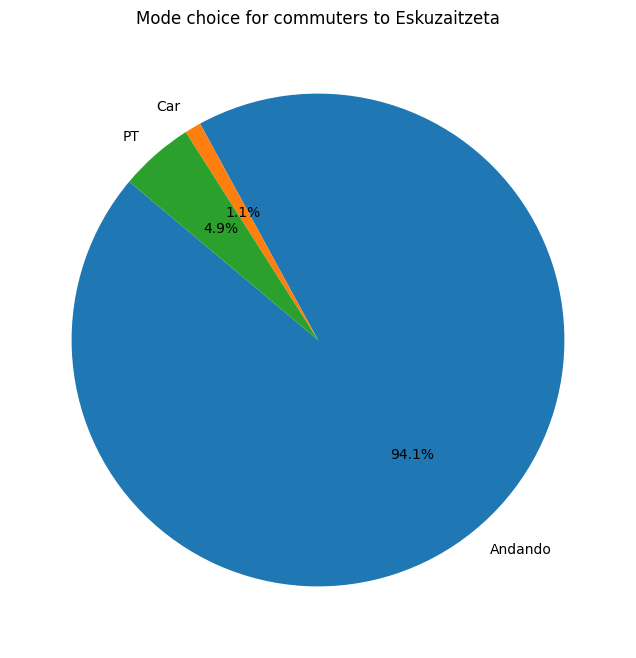

In [15]:
x = np.array(trips_ez.drop(columns = ['Mun_Des', 'Mun_Ori', 'Recur']))
y_pred = model.predict(x)

unique_labels, counts = np.unique(y_pred, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=unique_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mode choice for commuters to Eskuzaitzeta')
plt.show()